In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%pip install xlrd==2.0.1

Note: you may need to restart the kernel to use updated packages.


In [4]:
sales_2022 = pd.read_excel('./data/HGMI-SALES-2022-EXEDY BRAND.xls', skiprows=5)
sales_2022.head()

,DATE,INV. NO.,CUSTOMER,BRAND,DESCRIPTION,MODEL,PART NO #,SIZE,UNIT,QTY,UNIT PRICE,TOTAL
0,2022-01-18,160406,"2ND MILLENIUM AUTO SALES, INC.",DK,CLUTCH COVER ASSEMBLY,W04D,TYC-518,"10 7/8""X311.0MM",PIEC,1,3600,3600.0
1,2022-01-28,161294,"2ND MILLENIUM AUTO SALES, INC.",DK,CLUTCH DISC ASSEMBLY,DUTRO,TYD-139U,"11 3/4""X14TX32.4MM",PIEC,1,7300,7300.0
2,2022-01-19,160486,A.BONIFACIO AUTO SUPPLY,DK,CLUTCH DISC ASSEMBLY,4JG2 HEAVY DUTY,ISD-141U,"9 7/8""X24TX25.6MM",PIEC,1,2150,2150.0
3,2022-01-08,159640,ALISON ISUPARTS INC.,DK,CLUTCH DISC ASSEMBLY,4BA1,ISD-104US,"9 1/2""X24T FINE D.",PIEC,1,1200,1200.0
4,2022-01-24,160887,ALISON ISUPARTS INC.,DK,CLUTCH COVER ASSEMBLY,4D32 L.D.,MFC-540,"10 7/8"" DIAPH.",PIEC,5,2500,12500.0


## SUM OF TOTAL BY DESCRIPTION

                               TOTAL
DESCRIPTION                         
CLUTCH COVER ASSEMBLY    65965787.70
CLUTCH DISC ASSEMBLY     89214686.29
CLUTCH KIT WITH BEARING     68500.00
CLUTCH RELEASE BEARING     752792.50
CLUTCH SET                2724476.50
FLY WHEEL                   37000.00


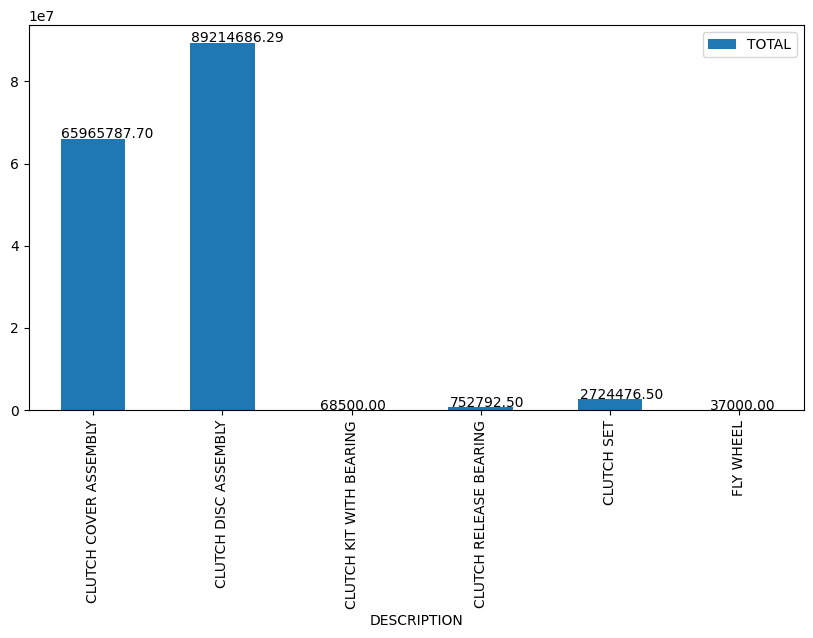

In [5]:
pivot_table = sales_2022.pivot_table(index='DESCRIPTION', values='TOTAL', aggfunc='sum')
print(pivot_table)
ax = pivot_table.plot(kind='bar', figsize=(10, 5))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

## MEAN OF TOTAL BY DESCRIPTION

                                TOTAL
DESCRIPTION                          
CLUTCH COVER ASSEMBLY    12982.835603
CLUTCH DISC ASSEMBLY     14893.937611
CLUTCH KIT WITH BEARING   9785.714286
CLUTCH RELEASE BEARING    6546.021739
CLUTCH SET               13971.674359
FLY WHEEL                37000.000000


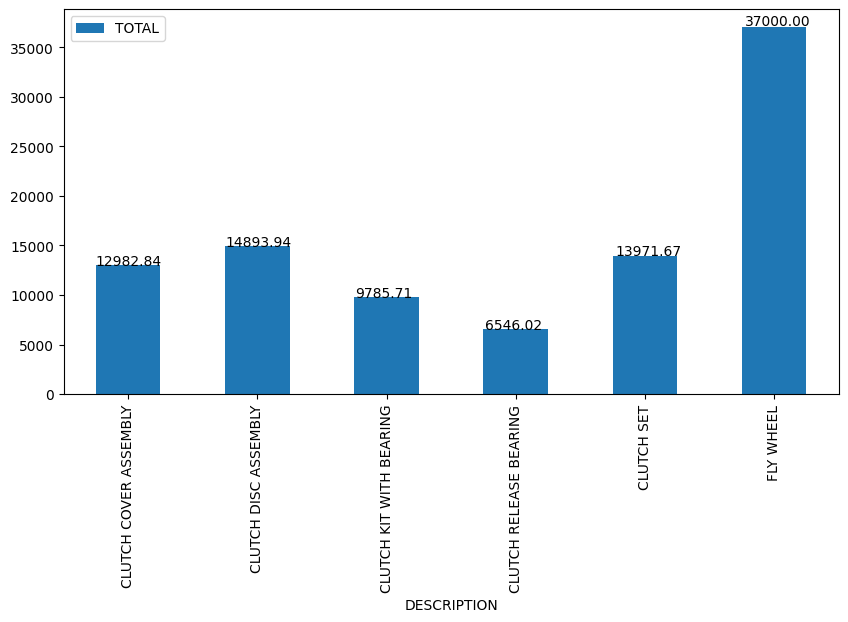

In [6]:
pivot_table_mean = sales_2022.pivot_table(index='DESCRIPTION', values='TOTAL', aggfunc='mean')
print(pivot_table_mean)
ax = pivot_table_mean.plot(kind='bar', figsize=(10, 5))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

### Get Unique Customers

In [7]:
unique_customers = sales_2022['CUSTOMER'].unique()
print(f'Unique Customers: {unique_customers}')

Unique Customers: ['2ND MILLENIUM AUTO SALES, INC.' 'A.BONIFACIO AUTO SUPPLY'
 'ALISON ISUPARTS INC.' 'ALPHARD MOTOR PARTS SUPPLY' 'ANGELEE TRADING'
 'ANGELO(ISUZU SALES)' 'ATCO PARTS CENTER, INC.' 'ATLAS AUTO SUPPLY INC.'
 'AUTO-HUB PARTS AND TRADING' 'AUTOPHIL ZONE SALES CORP.'
 'B.G. HACHUELA A/S' 'BENSCO ENTERPRISES' 'BESTCOLT TRADING CO., INC.'
 'BESTEE AND AUTO SUPPLY (BESTSON INC.)' 'BINAS AUTO SUPPLY'
 'BINCHELL AUTO PARTS SUPPLY' 'BINDY PARTS CORP.' 'BLEZZY KAR MARKETING'
 'BLOOMFIELD SALES SYSTEM LTD CO.' 'BRANDON SAMBAGAN'
 'BRYLLE & BRENT AUTO PARTS CENTER' 'CALAMBA ISUPART CENTER INC.'
 'CAPS GENERAL MERCHANDISE' 'CARLUX AUTO SUPPLY' 'CARPARTS HUB'
 'CARPOWER MOTOR PART INC.' 'CASH ON DELIVERY'
 'CEBU ISUZU PARTS SUPPLY, INC.' 'CEBU JAN SALES CORPORATION'
 'CH AUTO PARTS CENTER (R8 BLAZING TRAILS)'
 'COLUMBIAN TRACTOR PARTS SUPPLY' 'COMMUTER AUTOMOTIVE SUPPLY' 'DANNY LIM'
 'DANNY PIALAGO' 'DASMARIСAS ISUZU' 'DAV COMMERCIAL' 'DEDELZ MARKETING'
 'DEFECTIVE' 'DHENZ AUTO SUPPL

### Retrieve top 5 customers

CUSTOMER
RAM DIESEL PARTS CENTER, INCORPORATION     23268664.0
ONE TJID TRADING INC (INFINITE M/S)         8609399.0
K&K AUTO SUPPLY CORPORATION (AUTOXPERT)     8506995.0
BINDY PARTS CORP.                           7802075.0
INTERLINK MERCANTILE                        4723760.0
Name: TOTAL, dtype: float64


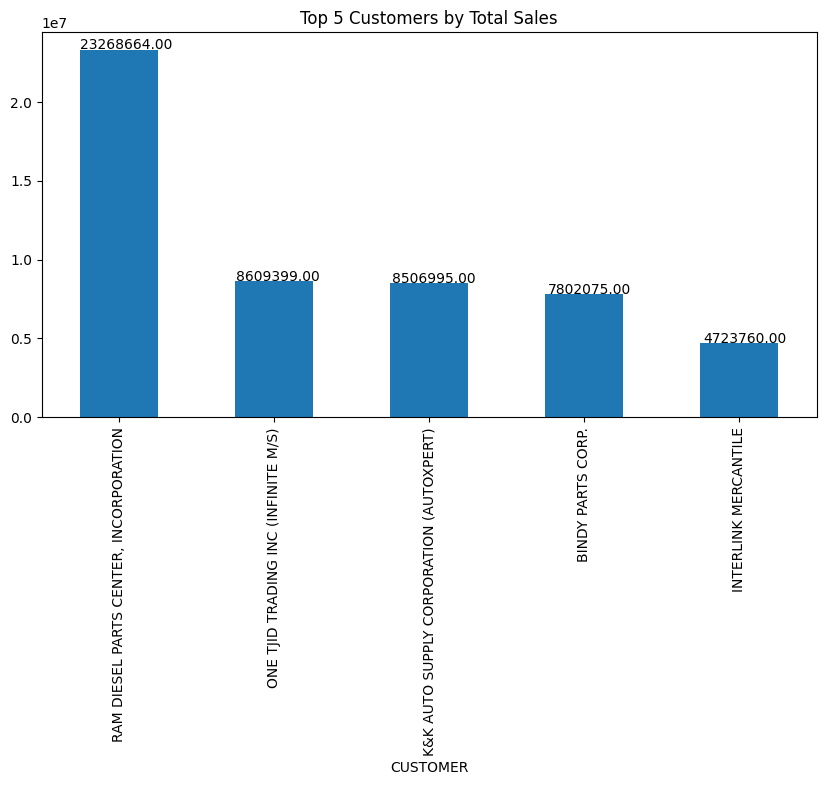

In [8]:
customer_total = sales_2022.groupby('CUSTOMER')['TOTAL'].sum().sort_values(ascending=False)

top_5_customers = customer_total.head(5)
print(top_5_customers)

ax = top_5_customers.plot(kind='bar', figsize=(10, 5), title='Top 5 Customers by Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

### Drill down per top customer

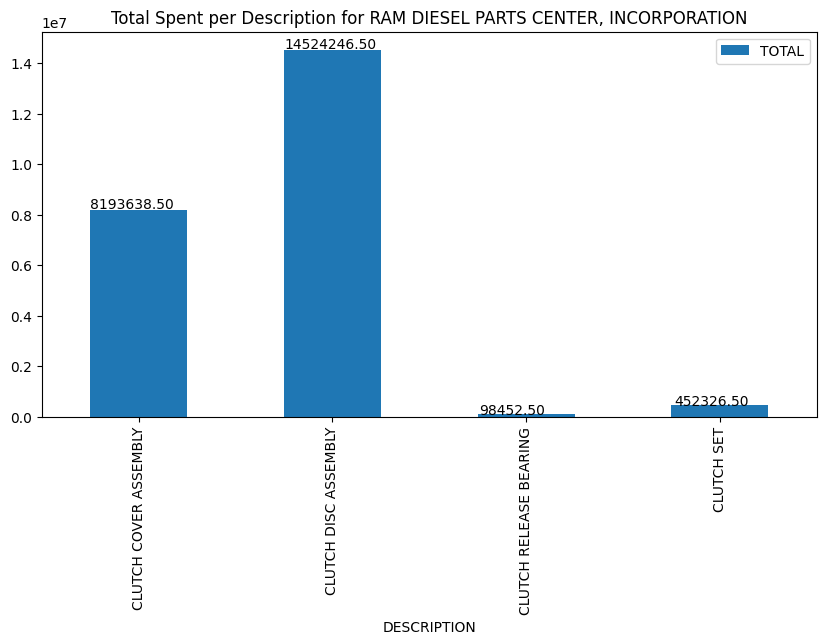

In [9]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

top_customer = top_5_customers.index[0]

top_customer_data = pivot_table_customer.loc[top_customer]

ax = top_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {top_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

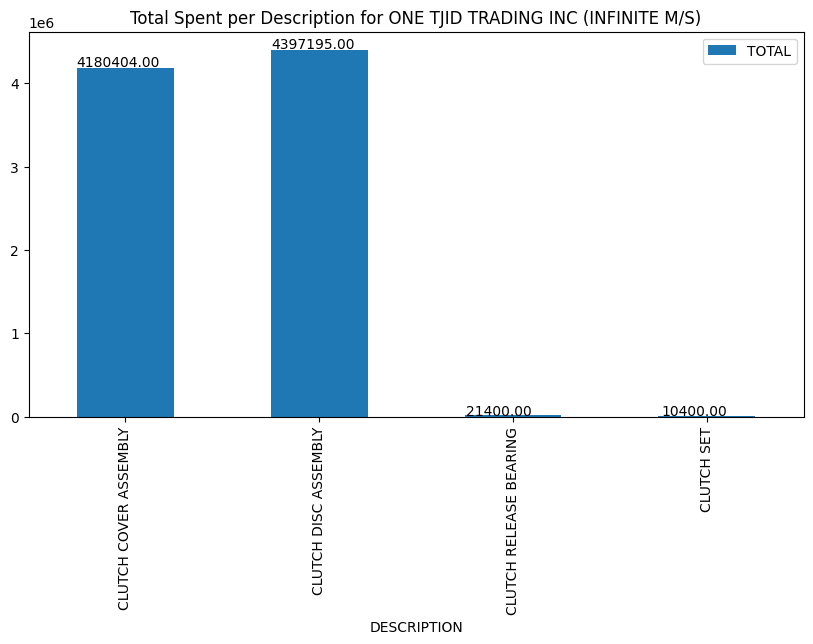

In [10]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

top_customer = top_5_customers.index[1]

top_customer_data = pivot_table_customer.loc[top_customer]

ax = top_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {top_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

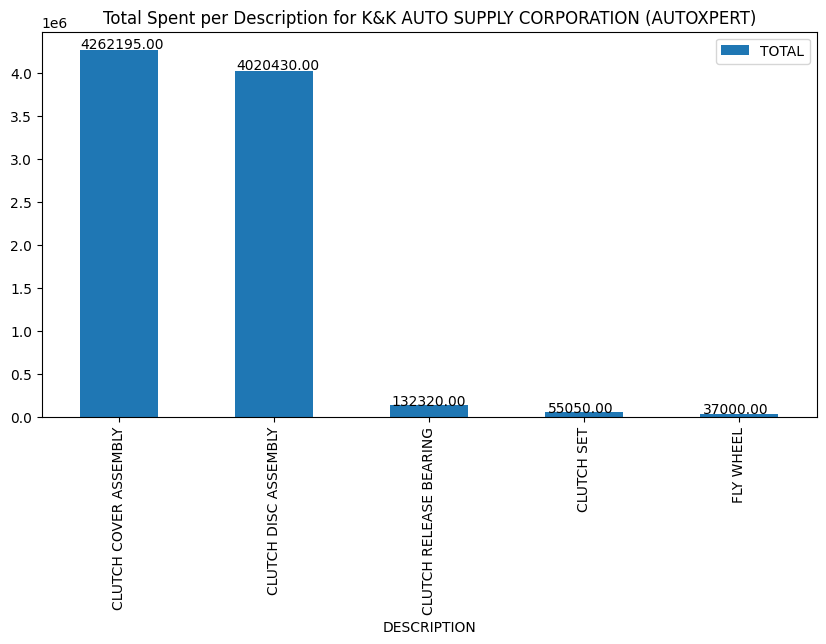

In [11]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

top_customer = top_5_customers.index[2]

top_customer_data = pivot_table_customer.loc[top_customer]

ax = top_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {top_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

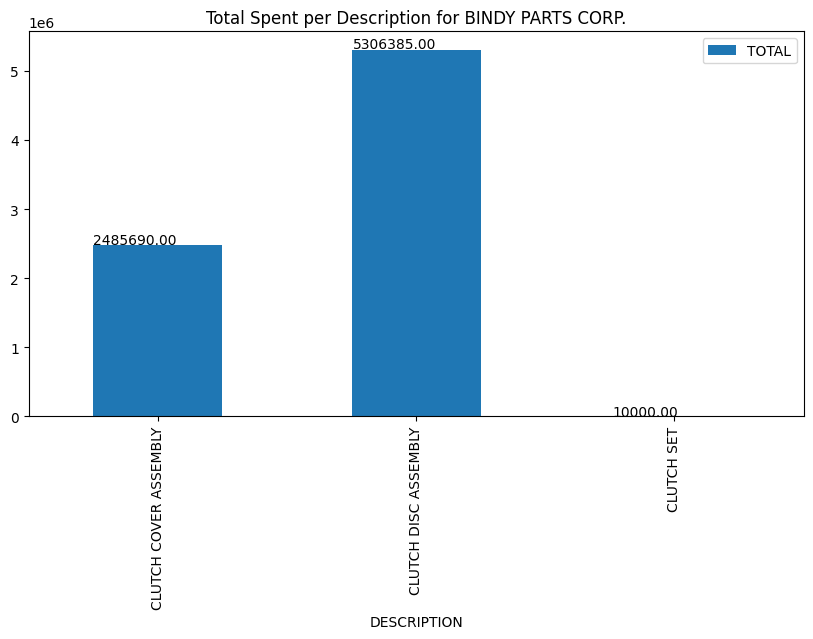

In [12]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

top_customer = top_5_customers.index[3]

top_customer_data = pivot_table_customer.loc[top_customer]

ax = top_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {top_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

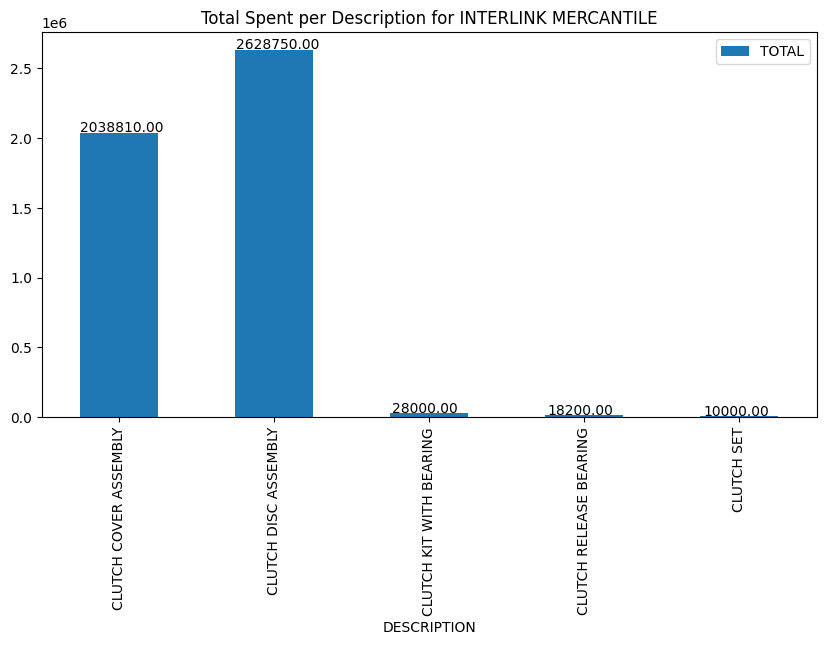

In [13]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

top_customer = top_5_customers.index[4]

top_customer_data = pivot_table_customer.loc[top_customer]

ax = top_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {top_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

### GET ALSO LEAST CUSTOMER SPENDING DATA? INSIGHTS FOR ENTRY LEVEL CUSTOMERS?

CUSTOMER
MICHAEL AGONOY             950.0
DCL AUTO PARTS             950.0
WRANGLER MERCHANDISING    1000.0
MAKMOD ADAM               1200.0
JOMER ENTERPRISES         1200.0
Name: TOTAL, dtype: float64


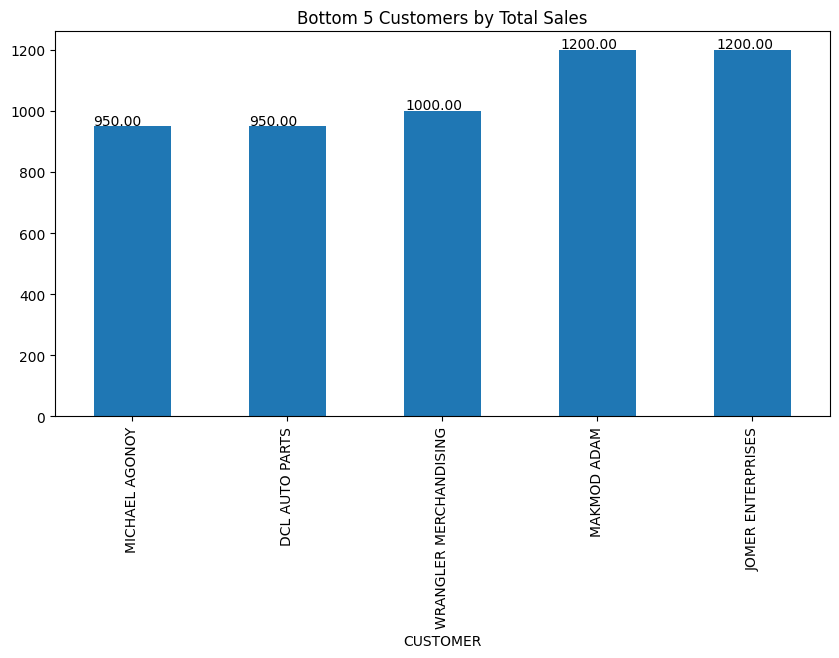

In [15]:
customer_total = sales_2022.groupby('CUSTOMER')['TOTAL'].sum().sort_values(ascending=True)

bottom_5 = customer_total.head(5)
print(bottom_5)

ax = bottom_5.plot(kind='bar', figsize=(10, 5), title='Bottom 5 Customers by Total Sales')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

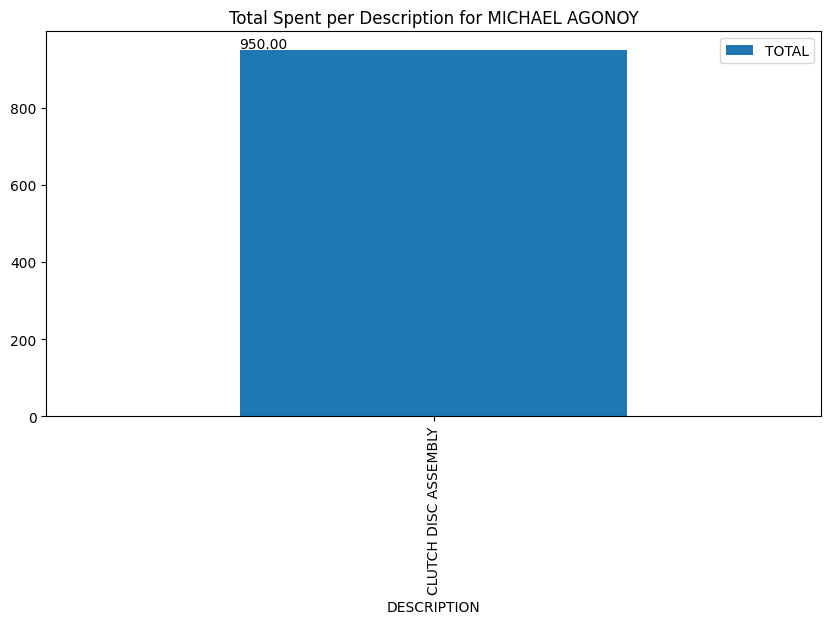

In [16]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

bottom_customer = bottom_5.index[0]

bottom_customer_data = pivot_table_customer.loc[bottom_customer]

ax = bottom_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {bottom_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

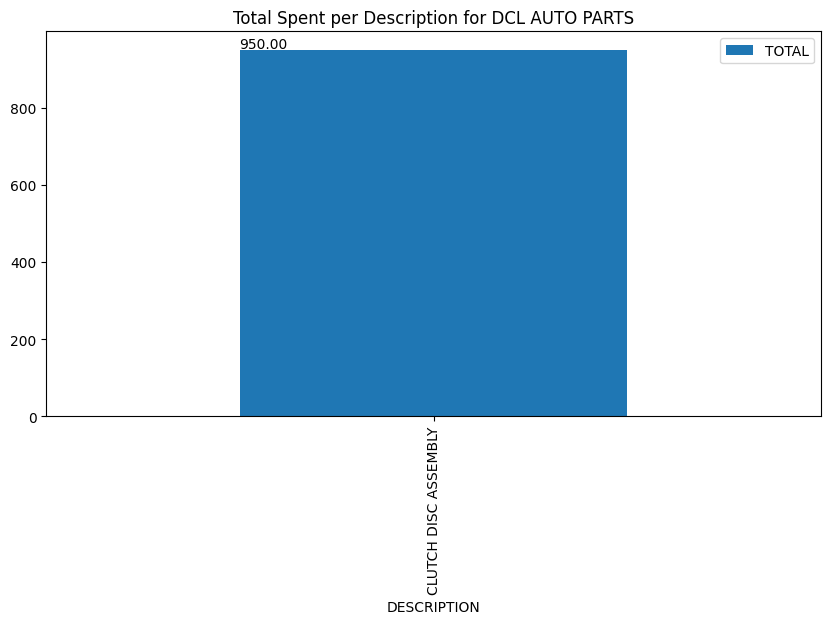

In [17]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

bottom_customer = bottom_5.index[1]

bottom_customer_data = pivot_table_customer.loc[bottom_customer]

ax = bottom_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {bottom_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

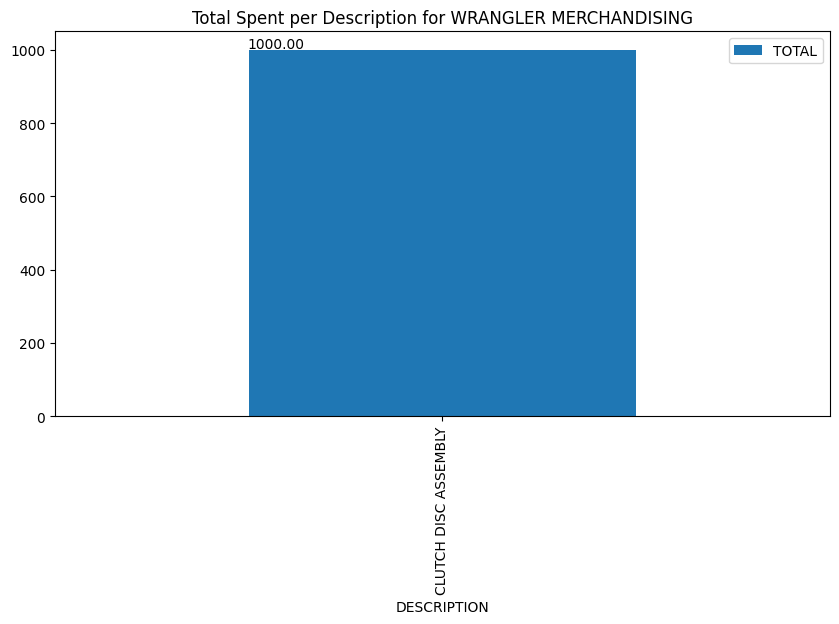

In [18]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

bottom_customer = bottom_5.index[2]

bottom_customer_data = pivot_table_customer.loc[bottom_customer]

ax = bottom_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {bottom_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

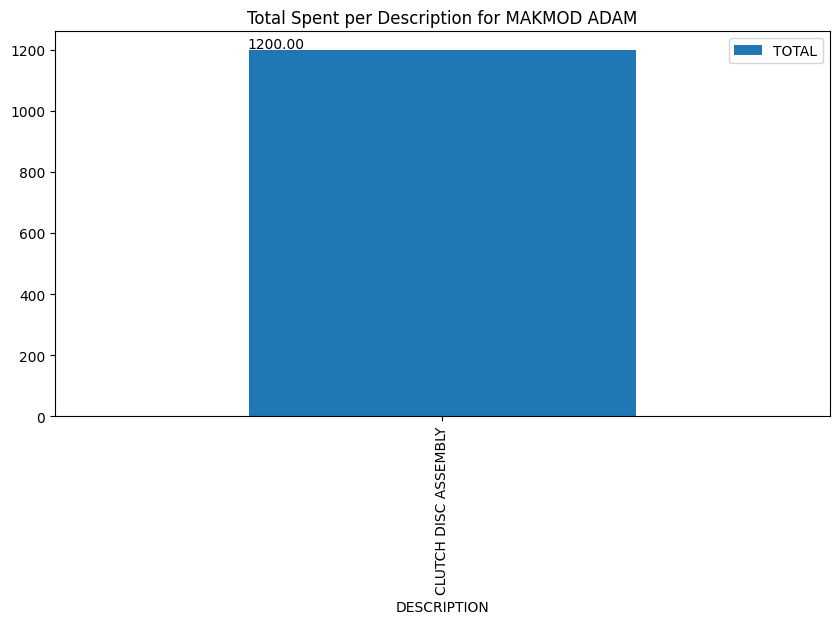

In [19]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

bottom_customer = bottom_5.index[3]

bottom_customer_data = pivot_table_customer.loc[bottom_customer]

ax = bottom_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {bottom_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

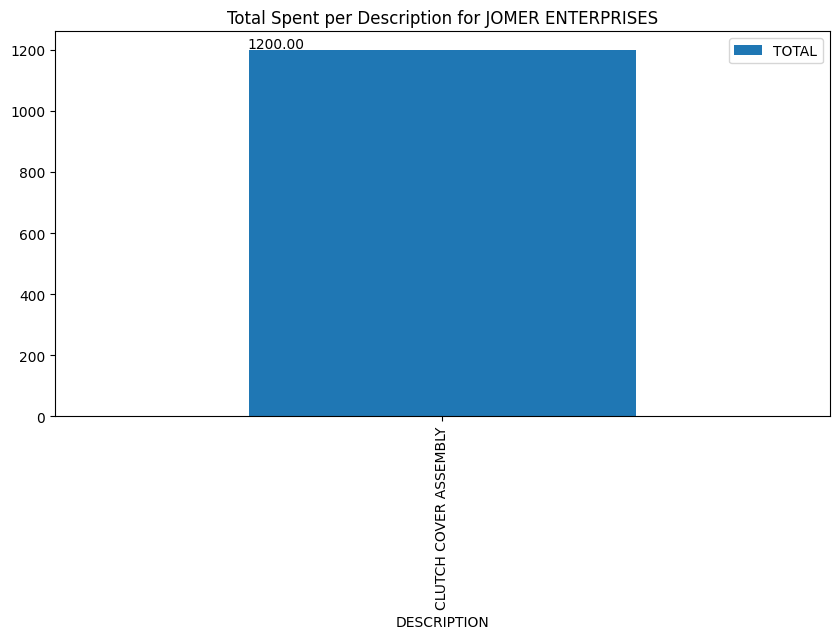

In [20]:
pivot_table_customer = sales_2022.pivot_table(index=['CUSTOMER', 'DESCRIPTION'], values='TOTAL', aggfunc='sum')

bottom_customer = bottom_5.index[4]

bottom_customer_data = pivot_table_customer.loc[bottom_customer]

ax = bottom_customer_data.plot(kind='bar', figsize=(10, 5), title=f'Total Spent per Description for {bottom_customer}')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()